## Task Description:
Your task is to analyze a dataset containing information on 472 startup companies, including details about the startups and their founders. The objective is to understand and explain the factors influencing the success or failure of these startups.

## Dataset:
You have access to a dataset that includes information on startup companies and founders. Additionally, a data dictionary explaining the variables is provided. You are encouraged to utilize any other relevant information for your analysis.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
missing=["No Info","None","none"]

encodings = ['utf-8-sig', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv("data.csv", encoding=encoding,na_values=missing)
        print(encoding)
        break
    except UnicodeDecodeError:        
        continue

latin1


In [56]:
df = pd.read_csv("data.csv", encoding='latin1')
#print(df.head())


<blockquote style="font-size: 16px; font-style: italic;">
Now, the next steps involve filling missing values with NaN and subsequently replacing these NaN values with suitable methods.
</blockquote>


<blockquote style="font-size: 16px; font-style: italic;">
The below code is calculating the total number and percentage of missing values for each column in the DataFrame and presenting the summary in a visually appealing table.
</blockquote>


In [57]:
missing_values_summary = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Total Values': df.shape[0],
    'Missing Values (%)': (df.isnull().sum() / df.shape[0]) * 100
})

missing_values_summary = missing_values_summary.sort_values(by='Missing Values (%)', ascending=False)

# Apply styling
styled_missing_values_summary = missing_values_summary.style \
    .set_caption("Missing Values Summary") \
    .set_table_styles([
        {'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '16px')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '14px')]}
    ]) \
    .format({'Missing Values (%)': '{:.2f}%'})
# Display
styled_missing_values_summary


,Null Values,Total Values,Missing Values (%)
Number of of Partners of company,284,472,60.17%
Number of of Research publications,250,472,52.97%
Employees count MoM change,205,472,43.43%
Top management similarity,199,472,42.16%
Time to maturity of technology (in years),172,472,36.44%
Gartner hype cycle stage,172,472,36.44%
Employee Count,166,472,35.17%
Last Funding Amount,160,472,33.90%
Short Description of company profile,149,472,31.57%
Degree from a Tier 1 or Tier 2 university?,144,472,30.51%


<blockquote style="font-size: 16px; font-style: italic;">
The code is imputing missing values for numeric columns using either the mean or median, and for categorical variables, it's imputing missing values with the mode.
</blockquote>


In [58]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        if df[col].dtype == 'float64':  
            df[col].fillna(df[col].mean(), inplace=True)  # Impute missing values with mean
        elif df[col].dtype == 'int64': 
            df[col].fillna(df[col].median(), inplace=True)  # Impute missing values with median

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]  # Calculate mode
        df[col].fillna(mode_val, inplace=True)  # Impute missing values with mode


<blockquote style="font-size: 16px; font-style: italic;">
The code is generating a bar plot to visualize the distribution of company status categories in the "Dependent-Company Status" column, including counts and percentages on each bar.
</blockquote>


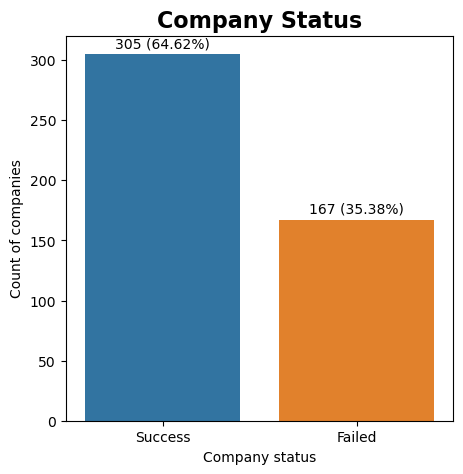

In [59]:
status_counts = df["Dependent-Company Status"].value_counts()
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title("Company Status", {'fontsize': 16, 'fontweight': "bold"})
plt.ylabel("Count of companies")
plt.xlabel("Company status")

total = len(df["Dependent-Company Status"])
for i in range(len(status_counts)):
    count = status_counts[i]
    percentage = (count / total) * 100
    plt.text(i, count + 3, f"{count} ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

<blockquote style="font-size: 16px; font-style: italic; color: #333;">
Failed companies constitute 35.38% of the dataset, while successful companies make up 64.62%. This visually compelling bar plot offers a clear understanding of the distribution of company statuses.
</blockquote>


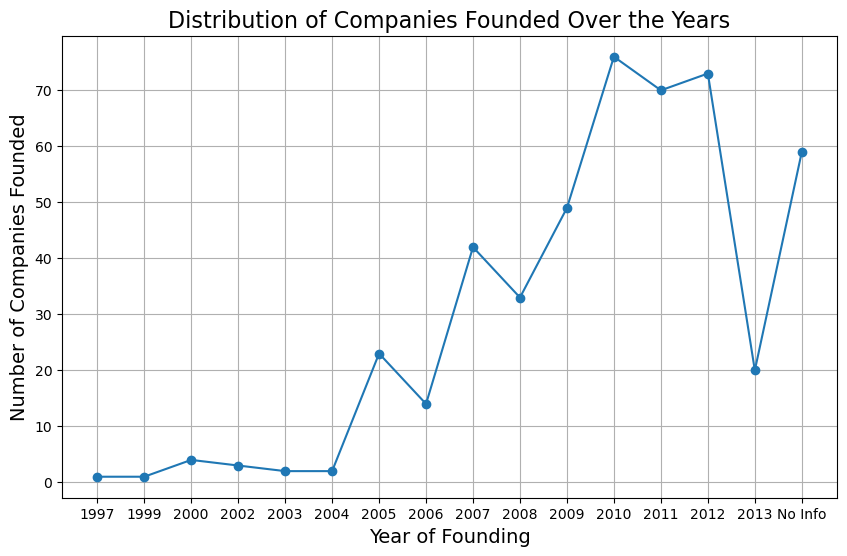

In [60]:
import matplotlib.pyplot as plt


yearly_founding_counts = df['year of founding'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_founding_counts.index, yearly_founding_counts.values, marker='o', linestyle='-')

plt.title('Distribution of Companies Founded Over the Years', fontsize=16)
plt.xlabel('Year of Founding', fontsize=14)
plt.ylabel('Number of Companies Founded', fontsize=14)

plt.grid(True)

plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
This plot visualizes the distribution of companies founded over the years. 
Each height of the point indicates the number of companies founded in that year.

The observations based on the distribution of companies founded over the years are as follows:

1. **Increasing Trend:** Overall, there is a noticeable increase in the number of companies founded, particularly from the mid-2000s onwards.

2. **Peak Years:** The years around 2010 and 2011 stand out with the highest number of companies founded, indicating periods of heightened entrepreneurial activity.

3. **Variability:** Despite the increasing trend, there are fluctuations in the number of companies founded in certain years, suggesting varying economic or industry conditions.
</blockquote>


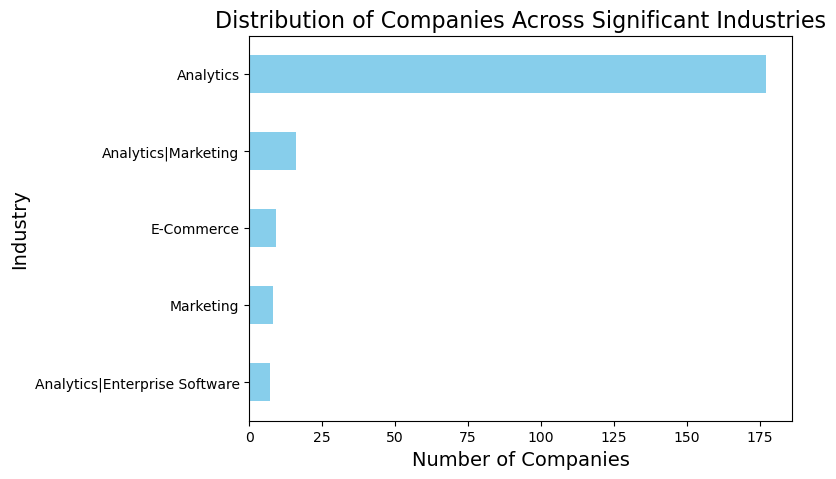

In [62]:
industry_counts = df['Industry of company'].value_counts()

threshold = 5
significant_industries = industry_counts[industry_counts > threshold]
plt.figure(figsize=(7, 5))
significant_industries.sort_values().plot(kind='barh', color='skyblue')

plt.title('Distribution of Companies Across Significant Industries', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
Here are the industries with a significant number of companies:

- Analytics: 177 companies
- Analytics|Marketing: 16 companies
- E-Commerce: 9 companies
- Marketing: 8 companies
- Analytics|Enterprise Software: 7 companies

These industries have a notable presence in the dataset, with varying counts of companies operating within each industry category.
</blockquote>

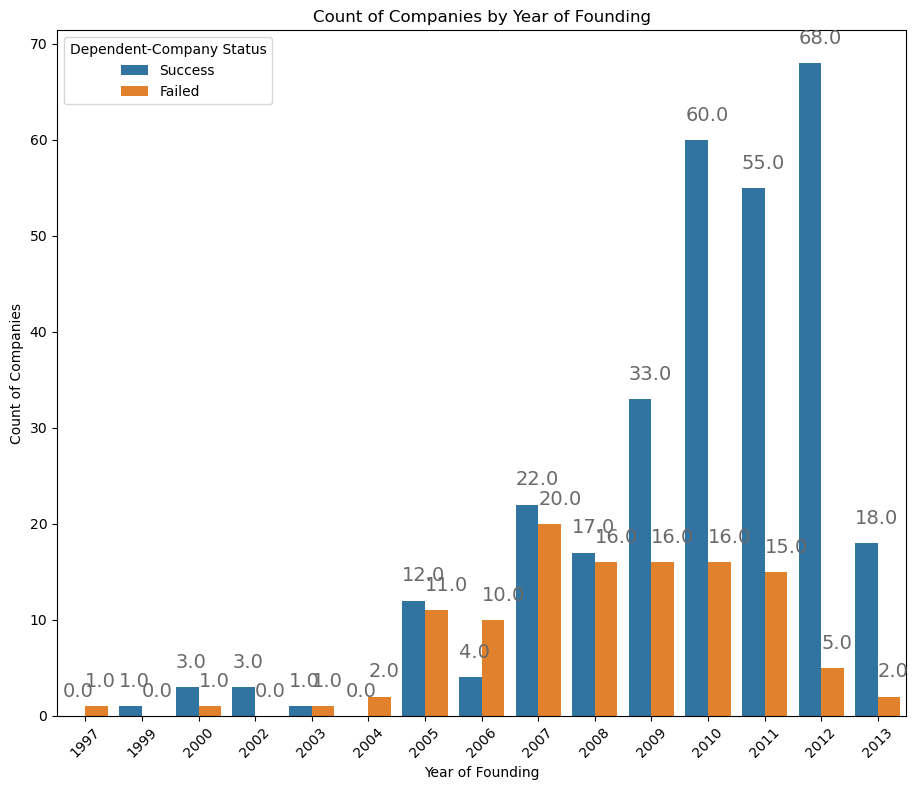

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df["year of founding"].str.isnumeric()]
filtered_df.loc[:, "year of founding"] = filtered_df["year of founding"].astype(int)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x=filtered_df["year of founding"], hue=filtered_df["Dependent-Company Status"])
plt.title("Count of Companies by Year of Founding")
plt.xlabel("Year of Founding")
plt.ylabel("Count of Companies")
plt.xticks(rotation=45)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+2, str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')

plt.tight_layout()
plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
This plot shows the number of companies founded in each year, with separate bars for successful and failed companies.
 
 2010, 2012, and 2011  had the highest number of companies founded overall.
</blockquote>



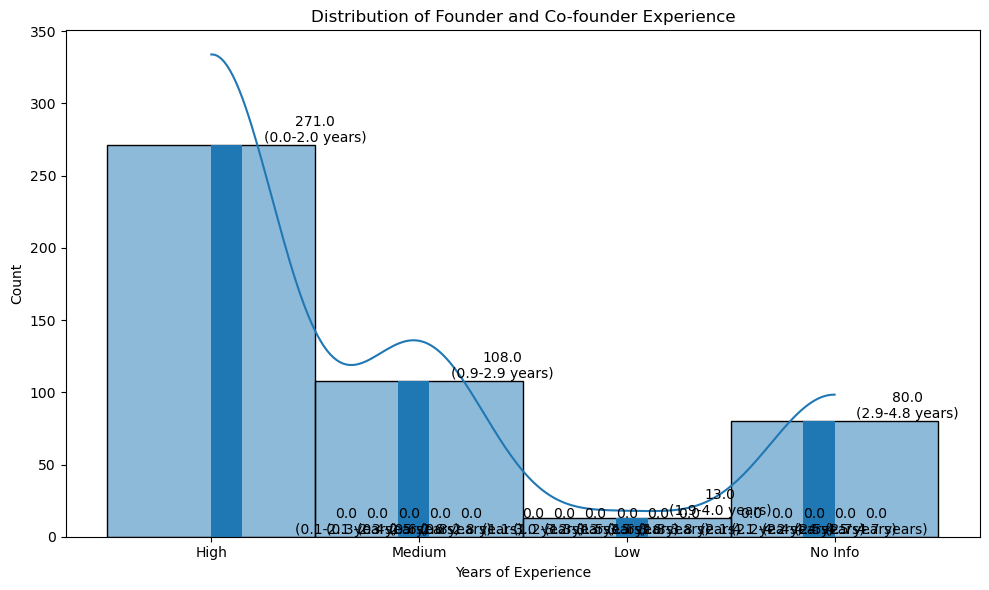

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Average Years of experience for founder and co founder"], bins=20, kde=True)
plt.title("Distribution of Founder and Co-founder Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.tight_layout()

# Extracting the histogram values
hist_values, bin_edges, _ = plt.hist(df["Average Years of experience for founder and co founder"], bins=20)
for count, bin_edge in zip(hist_values, bin_edges):
    plt.text(bin_edge + 0.5, count, f"{count}\n({bin_edge:.1f}-{bin_edge+2:.1f} years)", ha='center', va='bottom')

plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
From the histogram values:

1. The bin edges represent the range of years of experience for founders and co-founders. For example, the first bin represents the range from 0 to 0.15 years, the second bin represents the range from 0.15 to 0.3 years, and so on.

2. The counts represent the frequency of founders and co-founders falling within each bin range. For instance, there are 271 founders or co-founders with experience between 0 and 0.15 years, 108 founders or co-founders with experience between 0.75 and 0.9 years, and 13 founders or co-founders with experience between 1.95 and 2.1 years.

</blockquote>



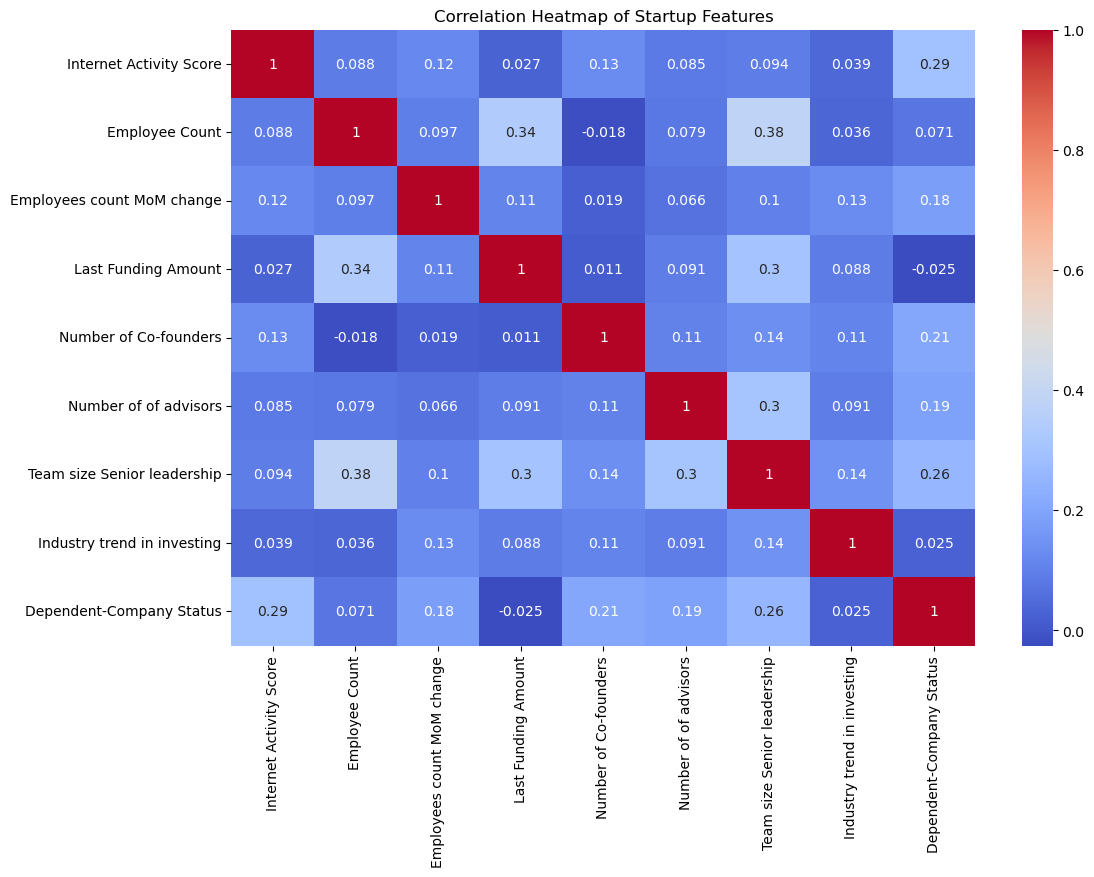

In [64]:
filtered_df = df.select_dtypes(include=[int, float]).copy()

filtered_df['Dependent-Company Status'] = df['Dependent-Company Status'].map({'Success': 1, 'Failed': 0})

correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Startup Features')
plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
**Observations from Correlation Matrix:**

1. **Last Funding Amount vs. Dependent-Company Status:** There is a weak negative correlation (-0.025432), suggesting that higher funding amounts might not guarantee success.

2. **Number of Co-founders vs. Dependent-Company Status:** The correlation is weakly negative (-0.017773), indicating that a higher number of co-founders might not significantly influence success.

3. **Positive Correlations:** Various factors such as Employee Count, Internet Activity Score, Number of Co-founders, Number of Advisors, and Team Size Senior Leadership show positive correlations with Dependent-Company Status. This suggests that larger teams, higher internet activity, and experienced leadership might be associated with success.

4. **Strongest Positive Correlation:** The strongest positive correlation (0.381368) is observed between Team Size Senior Leadership and Employee Count, indicating that companies with larger senior leadership teams tend to have more employees.

5. **Perfect Correlation:** The Dependent-Company Status is perfectly correlated with itself (1.0), as it represents the success or failure of the company.
</blockquote>



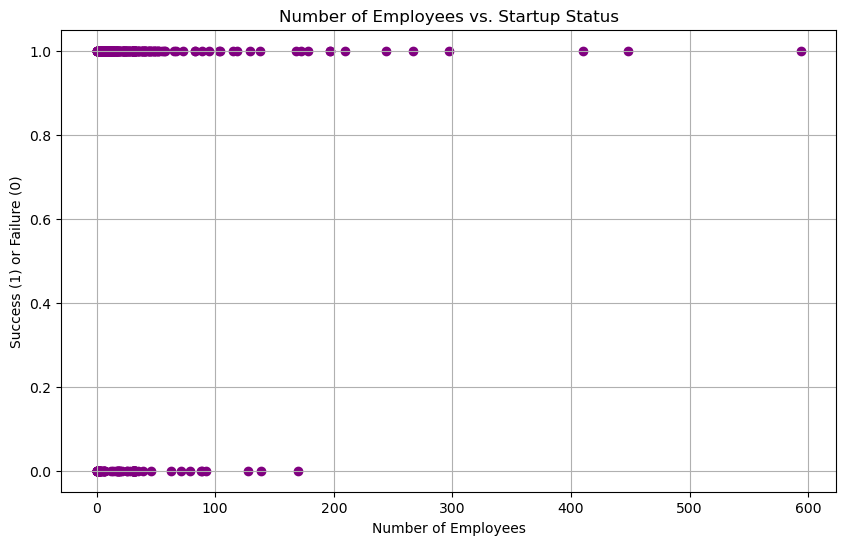

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Employee Count'], df['Dependent-Company Status'] == 'Success', c='purple')
plt.xlabel('Number of Employees')
plt.ylabel('Success (1) or Failure (0)')
plt.title('Number of Employees vs. Startup Status')
plt.grid(True)
plt.show()



<blockquote style="font-size: 16px; font-style: italic;">

There is no clear linear relationship between the number of employees and startup success. Data points are scattered throughout the chart, with successful startups having a range of employee counts and unsuccessful startups having a range of employee counts as well.

Some startups with a very small number of employees (less than 10) were successful.

There are also some very large startups (hundreds or even thousands of employees) that failed.
</blockquote>

/home/marine/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


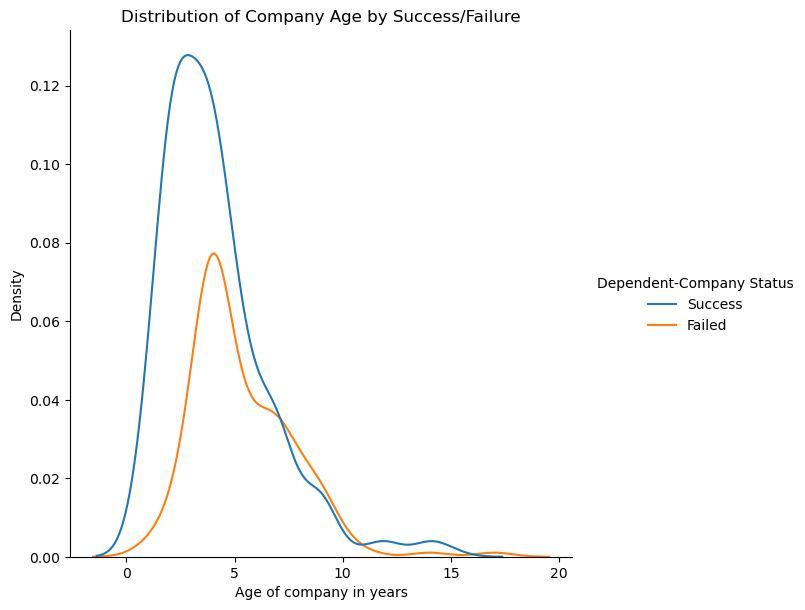

In [66]:
df["Age of company in years"] = pd.to_numeric(df["Age of company in years"].replace('No Info', float('nan')))

sns.displot(df, x='Age of company in years', hue='Dependent-Company Status', kind='kde', height=6)
plt.title('Distribution of Company Age by Success/Failure')
plt.xlabel('Age of company in years')
plt.ylabel('Density')
plt.show()

<blockquote style="font-size: 16px; font-style: italic;">

**Success:**

There seems to be a peak in successful companies around 2-4 years old. This could indicate that companies that achieve a good product-market fit and initial traction within the first few years are more likely to succeed.

The number of successful companies appears to decline steadily after 4 years, but there are still successful companies at all ages. This suggests that success can happen at any stage, but it becomes less frequent as companies age.

**Failure:**

Failures are more spread out across different ages compared to successes. There are many failures in the first 4 years, but a significant number also fail later on. This suggests that challenges can arise at any point in a company's life.

There's a possible peak in failures around 4 years old, which might be companies that initially seemed promising but couldn't sustain growth.

**Overall:**

It appears to be easier for a company to find success early on (within the first 4 years) but there's still a chance of success later.

Failure is more evenly distributed across a company's lifespan.
</blockquote>


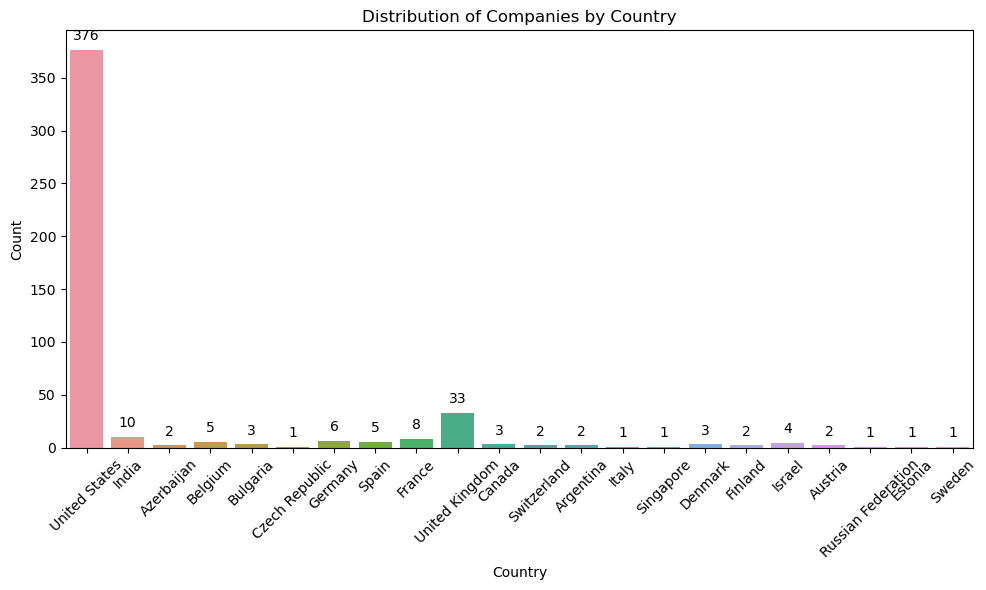

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Country of company", data=df)
plt.title("Distribution of Companies by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()



<blockquote style="font-size: 16px; font-style: italic;">

The dataset predominantly comprises companies from the United States, followed by the United Kingdom and India. Other countries, such as France, Germany, and Belgium, also contribute, albeit to a lesser extent. Overall, the dataset reflects a diverse geographic representation, suggesting a global perspective in the compilation of companies. This distribution underscores the varied origins of entrepreneurial endeavors and highlights potential market opportunities across different regions.
</blockquote>


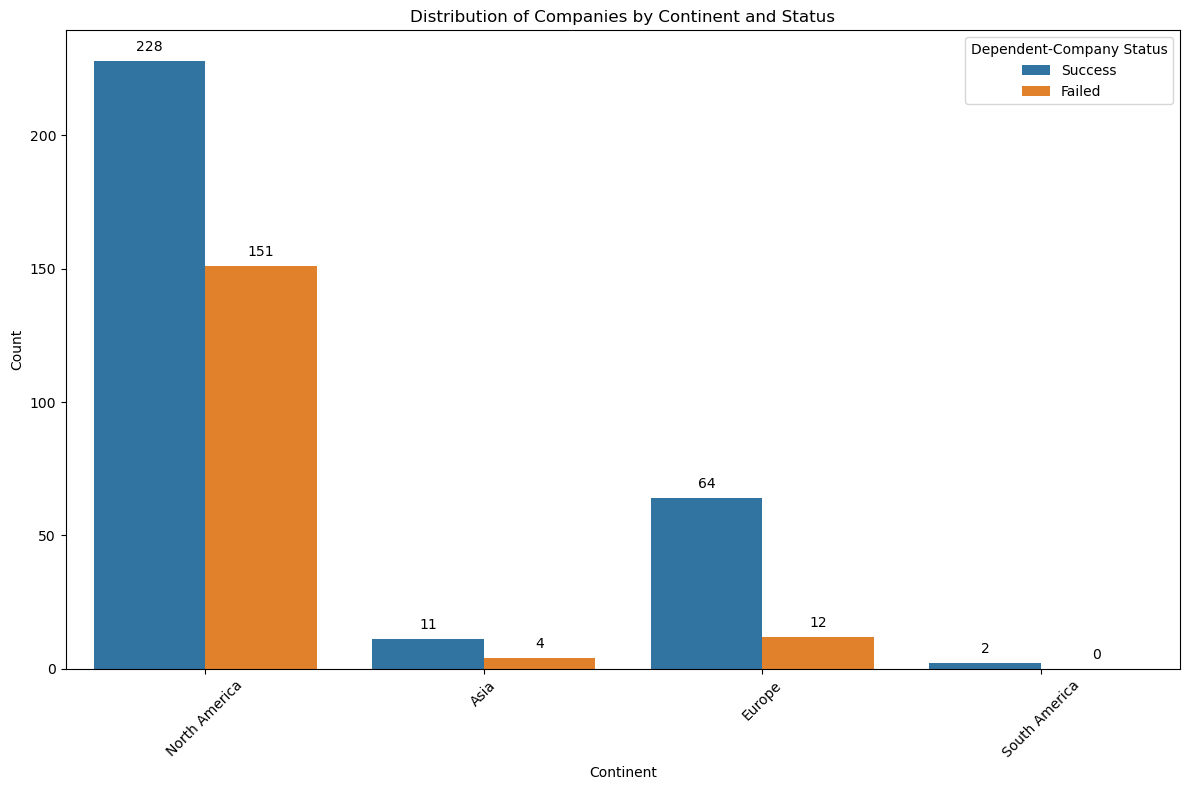

In [67]:
plt.figure(figsize=(12, 8))  # Adjusted for better visualization
ax = sns.countplot(x="Continent of company", hue="Dependent-Company Status", data=df)
plt.title("Distribution of Companies by Continent and Status")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding annotations on each bar
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not null (NaN)
        ax.annotate(format(height, '.0f'), 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()




<blockquote style="font-size: 16px; font-style: italic;">

1. **North America Leads**: It dominates in both successful and failed companies, indicating a robust startup ecosystem.
  
2. **Europe's Mixed Performance**: While it has a significant number of successful companies, it also faces a relatively high failure rate.

3. **Asia's Promising Success**: Despite fewer companies, Asia shows a higher success rate, suggesting potential growth opportunities.

4. **South America's Potential**: Although fewer in number, South America has a notable presence of successful companies, indicating growth potential in the region.

5. **Overall Impression**: North America has a mature ecosystem, Europe faces challenges, Asia shows promise, and South America offers growth prospects.
</blockquote>


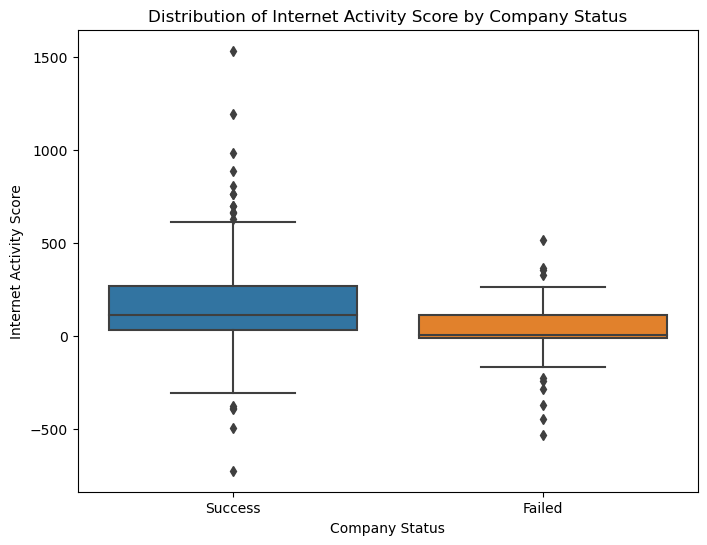

                          count        mean        std    min   25%  \
Dependent-Company Status                                              
Failed                    167.0   31.772617  120.83305 -535.0  -9.5   
Success                   305.0  159.270012  232.93777 -725.0  33.0   

                                 50%         75%     max  
Dependent-Company Status                                  
Failed                      3.000000  114.159705   516.0  
Success                   114.159705  268.000000  1535.0  


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Dependent-Company Status', y='Internet Activity Score', data=df)
plt.title('Distribution of Internet Activity Score by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Internet Activity Score')
plt.show()

print(df.groupby('Dependent-Company Status')['Internet Activity Score'].describe())


<blockquote style="font-size: 16px; font-style: italic;">

The analysis reveals a distinct trend: successful companies exhibit notably higher Internet Activity Scores compared to their failed counterparts. This is evident from the substantially higher mean and median scores observed for successful companies, along with a wider range of scores, implying a greater diversity in online activity levels among successful ventures. These findings underscore the potential significance of active online presence and engagement as contributing factors to the success of companies.

</blockquote>


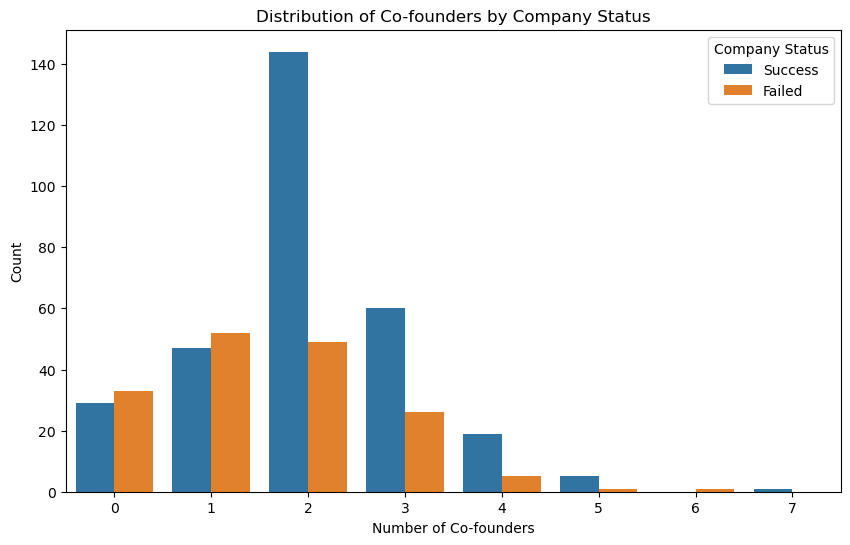

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Co-founders', hue='Dependent-Company Status', data=df)
plt.title('Distribution of Co-founders by Company Status')
plt.xlabel('Number of Co-founders')
plt.ylabel('Count')
plt.legend(title='Company Status')
plt.show()



<blockquote style="font-size: 16px; font-style: italic;">

1. Failed companies often have 1 or 2 co-founders, whereas successful ones frequently have 2 or 3.
2. Instances of companies with 0 co-founders are notable but uncommon.
3. Most companies tend to have fewer co-founders overall.
</blockquote>


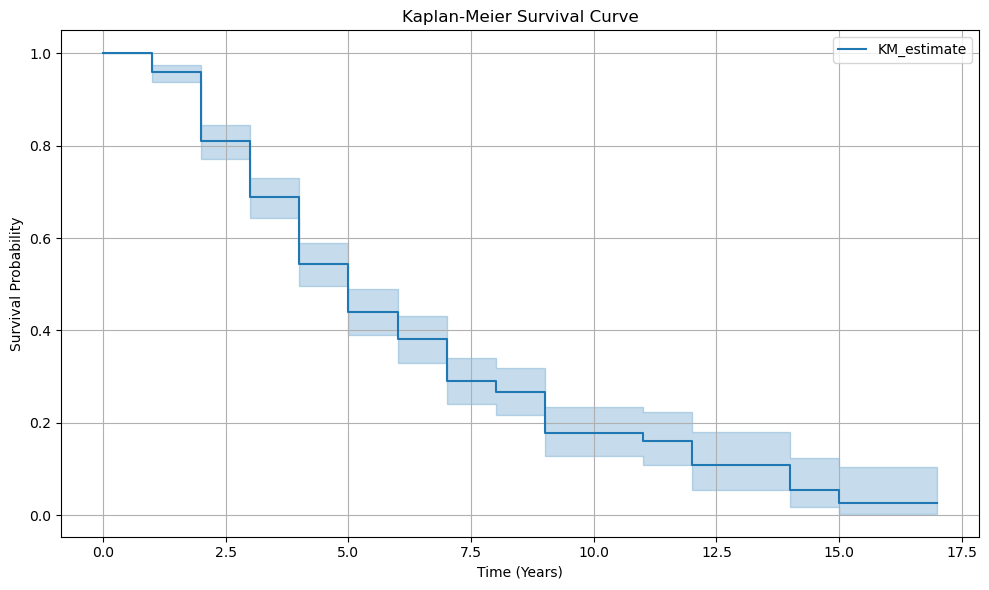

In [72]:
from lifelines import KaplanMeierFitter

# Replace 'No Info' with NA
df.replace('No Info', pd.NA, inplace=True)

# Drop rows with missing values in specified columns
df.dropna(subset=['Dependent-Company Status', 'Age of company in years'], inplace=True)

# Create the event variable
df['Event'] = df['Dependent-Company Status'] == 'Success'

# Convert 'Age of company in years' to numeric
df['Time'] = pd.to_numeric(df['Age of company in years'], errors='coerce')

# Fit the Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(durations=df['Time'], event_observed=df['Event'])

plt.figure(figsize=(10, 6))
kmf.plot()
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


<blockquote style="font-size: 16px; font-style: italic;">
At time 0, the survival probability is 1.000, which means all companies are surviving at the beginning.
At time 1, the survival probability drops to approximately 0.961, indicating a slight decrease in survival.
This pattern continues for each time point, showing the survival probabilities decreasing over time.
</blockquote>


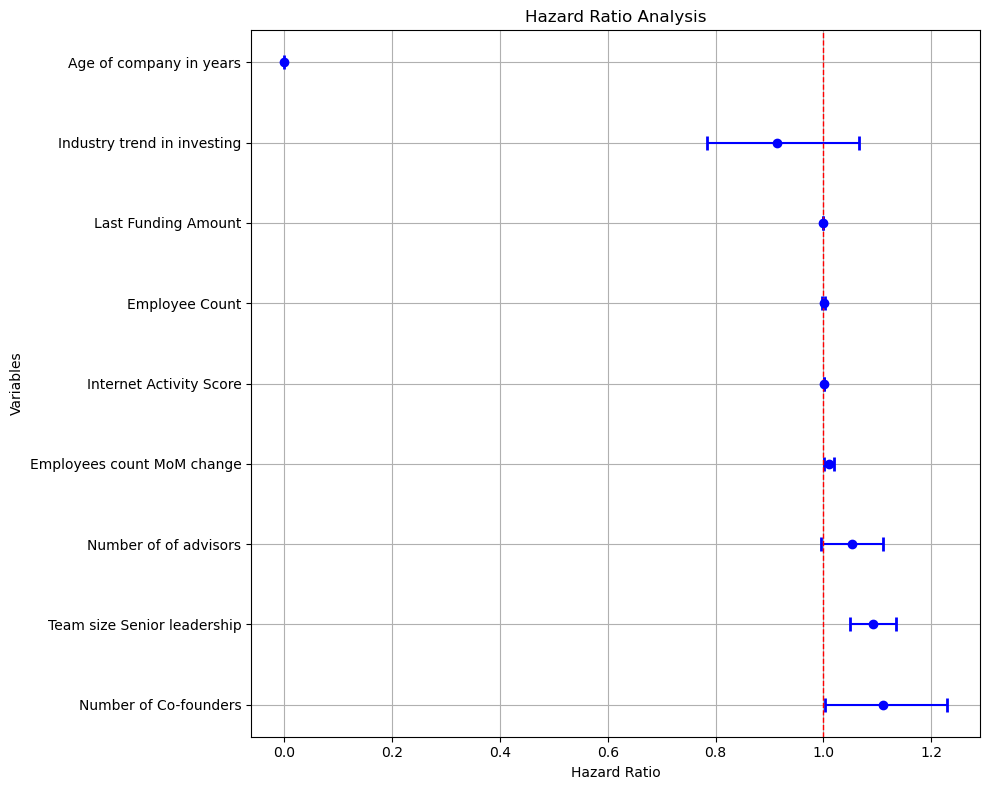

In [73]:
import numpy as np

# Sort covariates based on hazard ratio
sorted_covariates = cph.summary.sort_values(by='exp(coef)', ascending=False)

# Plot hazard ratios and confidence intervals
plt.figure(figsize=(10, 8))
plt.errorbar(
    y=np.arange(len(sorted_covariates)),
    x=sorted_covariates['exp(coef)'],
    xerr=(sorted_covariates['exp(coef)'] - sorted_covariates['exp(coef) lower 95%'],
          sorted_covariates['exp(coef) upper 95%'] - sorted_covariates['exp(coef)']),
    fmt='o', linestyle='none', color='b', capsize=5, capthick=2
)
plt.yticks(np.arange(len(sorted_covariates)), sorted_covariates.index)
plt.axvline(x=1, linestyle='--', color='r', linewidth=1)
plt.xlabel('Hazard Ratio')
plt.ylabel('Variables')
plt.title('Hazard Ratio Analysis')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
print(sorted_covariates)


                                     coef     exp(coef)      se(coef)  \
covariate                                                               
Number of Co-founders        1.044324e-01  1.110080e+00  5.185243e-02   
Team size Senior leadership  8.722164e-02  1.091138e+00  2.017727e-02   
Number of of advisors        5.072541e-02  1.052034e+00  2.796759e-02   
Employees count MoM change   9.593985e-03  1.009640e+00  4.733523e-03   
Internet Activity Score      9.687185e-04  1.000969e+00  2.574039e-04   
Employee Count               2.143655e-04  1.000214e+00  1.504719e-03   
Last Funding Amount         -5.570896e-09  1.000000e+00  9.179723e-09   
Industry trend in investing -8.966136e-02  9.142407e-01  7.872922e-02   
Age of company in years     -2.126284e+01  5.829973e-10  1.566643e+03   

                             coef lower 95%  coef upper 95%  \
covariate                                                     
Number of Co-founders          2.803490e-03    2.060613e-01   
Team si

<blockquote style="font-size: 16px; font-style: italic;">

In the plot generated, each point represents a covariate (independent variable) in the Cox Proportional Hazards model. Here's what we can understand from the plot:

1. **Position of Points**: The position of each point along the y-axis corresponds to a specific covariate. The covariates are sorted based on their hazard ratios in descending order, with the covariate with the highest hazard ratio at the top and the one with the lowest hazard ratio at the bottom.

2. **Hazard Ratio and Confidence Intervals**: The x-axis represents the hazard ratio for each covariate. The points are plotted at the hazard ratio value, and error bars indicate the 95% confidence intervals around the hazard ratio estimate. If the error bars overlap with the vertical dashed line at x=1 (no effect), it suggests that the hazard ratio is not significantly different from 1 (no effect).

3. **Interpretation**:
   - Covariates with points to the right of the dashed line (x=1) have hazard ratios greater than 1, indicating an increased risk of failure associated with higher values of those covariates.
   - Covariates with points to the left of the dashed line (x=1) have hazard ratios less than 1, suggesting a decreased risk of failure associated with higher values of those covariates.
   - The length of the error bars provides information about the uncertainty around the hazard ratio estimate. Narrower error bars indicate higher precision in the estimate, while wider error bars suggest greater uncertainty.

4. **Significance**: Covariates with hazard ratios significantly different from 1 (no effect) are those for which the confidence intervals do not overlap with the dashed line at x=1. These covariates are considered statistically significant predictors of the hazard of failure.




To calculate the percent change in risk, we use the formula:

**Percent Change} = (HR - 1) x 100**

For example, if the hazard ratio for a covariate is 1.1, it means the risk of failure is 10% higher compared to the reference group. If the hazard ratio is 0.9, it means the risk of failure is 10% lower compared to the reference group.

In the provided output, the "exp(coef)" column represents the hazard ratio, and the percent change is calculated using this formula.
</blockquote>


<blockquote style="font-size: 16px; font-style: italic;">

1. **Number of Co-founders**: More co-founders increase the risk of failure by up to 23%.
2. **Team size Senior leadership**: Larger senior leadership teams raise the risk of failure by up to 14%.
3. **Number of of advisors**: Additional advisors increase the risk of failure by up to 11%.
4. **Employees count MoM change**: Increasing employee count month-over-month raises the risk of failure by up to 2%.
5. **Internet Activity Score**: Internet activity score has minimal impact on failure risk.
6. **Employee Count**: Employee count doesn't significantly affect failure risk.
7. **Last Funding Amount**: Last funding amount doesn't impact failure risk.
8. **Industry trend in investing**: Being in a high-investment industry slightly reduces failure risk by up to 22%.
9. **Age of company in years**: Older companies have significantly lower failure risk, though the exact decrease is uncertain due to wide confidence intervals.
</blockquote>
